# Herramientas de estadística y probabilidad

## 1. Objetivo Requerimiento 2.
  Crea un script ("prop_sales_delay_status_by_quarte.py") que calcule la proporción que han representado las ventas de órdenes completas de Oilst dentro de los categorías de delay_status y a los largo de los trimestres de 2016 a 2018. El resultado de este script deberá ser un tabla denominada “prop_sales_delay_status_by_quarte.csv”



# 2. Librerías de trabajo

In [69]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 3. Lectura de datos
Trabajaremos con el archivo consolidado creado en el primer requerimiento del Sprint 1.

In [10]:
#Carpeta donde se encuentran los recursos
DATA_PATH = '/content/'
FILE_OLIST_PROCESSED = 'oilst_processed.csv'

In [11]:
#Validamos que exista el archivo
print(f'ruta de archivo: {DATA_PATH}{FILE_OLIST_PROCESSED}')
os.path.exists(f'{DATA_PATH}{FILE_OLIST_PROCESSED}')

ruta de archivo: /content/oilst_processed.csv


True

Crearemos un un dataframe del archivo consolidado.



In [12]:
df_oilst = pd.read_csv(f'{DATA_PATH}{FILE_OLIST_PROCESSED}')
df_oilst.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_distribution_center,year,...,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,abbreviation,state_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.84,2017,...,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,SP,São Paulo
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,25.53,2018,...,47813,barreiras,BA,47813.0,-12.169860,-44.988369,barreiras,BA,BA,Bahia
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,61.56,2018,...,75265,vianopolis,GO,75265.0,-16.746337,-48.514624,vianopolis,GO,GO,Goiás
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,60.30,2017,...,59296,sao goncalo do amarante,RN,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN,RN,Rio Grande do Norte
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,80.97,2018,...,9195,santo andre,SP,9195.0,-23.675037,-46.524784,santo andre,SP,SP,São Paulo


In [14]:
df_oilst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   distance_distribution_center   96470 non-null  float64
 9   year                           99441 non-null  int64  
 10  month                          99441 non-null  int64  
 11  quarter                        99441 non-null  object 
 12  year_month                     99441 non-null 

Podemos notar que algunas columnas que son fecha no están siendo tratadas como tal, por lo que procedemos a formatearlas.



In [15]:
#Lista de columnas que son de tipo fecha
colums_date = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
    ]

# Lectura del archivo csv
df_oilst = pd.read_csv(
    os.path.join(DATA_PATH, FILE_OLIST_PROCESSED),
    parse_dates=colums_date
    )

# 4. EDA
### 4.1 Información del dataframe

In [17]:
df_oilst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   distance_distribution_center   96470 non-null  float64       
 9   year                           99441 non-null  int64         
 10  month                          99441 non-null  int64         
 11  quarter        

In [19]:
df_oilst.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'distance_distribution_center', 'year', 'month', 'quarter',
       'year_month', 'delta_days', 'delay_status', 'total_products',
       'total_sales', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state', 'abbreviation', 'state_name'],
      dtype='object')

Obtener solo columnas numéricas

In [29]:
df_oilst.select_dtypes(include='number').columns

Index(['distance_distribution_center', 'year', 'month', 'delta_days',
       'total_products', 'total_sales', 'customer_zip_code_prefix',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'],
      dtype='object')

Obtener las columnas categoricas

In [28]:
df_oilst.select_dtypes(include='object').columns

Index(['order_id', 'customer_id', 'order_status', 'quarter', 'year_month',
       'delay_status', 'customer_unique_id', 'customer_city', 'customer_state',
       'geolocation_city', 'geolocation_state', 'abbreviation', 'state_name'],
      dtype='object')

Exploramos columnas individuales

In [33]:
df_oilst['total_sales']

,total_sales
0,29.99
1,118.70
2,159.90
3,45.00
4,19.90
...,...
99436,72.00
99437,174.90
99438,205.99
99439,359.98


Podemos analizar en particular esta solumna con la funcion describe()

In [34]:
df_oilst['total_sales'].describe()

,total_sales
count,98666.000000
mean,137.754076
std,210.645145
min,0.850000
25%,45.900000
50%,86.900000
75%,149.900000
max,13440.000000


Con esto podemos ver que el valor máximo de total_sales es de 13440 y lo podemos comprobar ordenando esta columna de forma descendente

In [38]:
df_oilst.sort_values(by='total_sales', ascending=False)['total_sales'].head(5)

,total_sales
13390,13440.0
66599,7160.0
22171,6735.0
28326,6729.0
3508,6499.0


También podemos analizar los valores únicos de la variable categórica order_satus.

In [39]:
df_oilst['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

También podemos obtener la cantidad de registros de cada una order_status con ```.value_counts()```



In [47]:
df_oilst['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


Podemos hacer una gráfica de barras para order_status

<Axes: xlabel='order_status'>

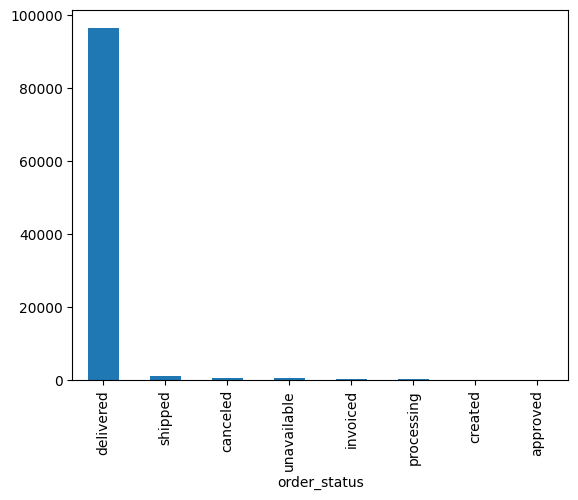

In [42]:
df_oilst['order_status'].value_counts().plot(kind='bar')

**Importante la columna order_status cuando es delivered ya que es la que nos va ayudar a identificar los pedidos entregados con retraso**

In [48]:
# creamos un df de puros pedidos entregados
df_delivered = df_oilst.query('order_status == "delivered"')

In [50]:
df_delivered.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_distribution_center,year,...,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,abbreviation,state_name
10026,88d8024d811be666f66e7199e27a830b,3875a06057658fadbb8715a4f25eeaba,delivered,2018-08-12 01:10:43,2018-08-12 01:25:10,2018-08-14 13:24:00,2018-08-18 16:52:48,2018-08-24,40.27,2018,...,17515,marilia,SP,17515.0,-22.210461,-49.935713,marilia,SP,SP,São Paulo
9687,5c966af20bdad2fc92140be537e76912,f6b6b5ca3111887288b23cdeb52d28b6,delivered,2017-08-17 08:04:24,2017-08-18 02:35:29,2017-08-24 21:13:29,2017-09-06 21:56:56,2017-09-15,49.73,2017,...,37900,passos,MG,37900.0,-20.720246,-46.611995,passos,MG,MG,Minas Gerais
32054,5c63162ff15f6e39ca02c3dbc82ecf65,d27812f504d4415e126b6fba33f631d0,delivered,2017-10-13 22:30:31,2017-10-13 22:45:31,2017-10-16 18:05:17,2017-10-17 14:03:04,2017-10-25,45.15,2017,...,8780,mogi das cruzes,SP,8780.0,-23.521449,-46.176732,mogi das cruzes,SP,SP,São Paulo
54107,2b870c394b01b5819a2df099f224b1cf,37f43a03235c538c8eff853b7101996a,delivered,2018-08-10 13:58:26,2018-08-10 14:15:13,2018-08-13 14:31:00,2018-08-23 11:58:41,2018-09-04,58.88,2018,...,88900,ararangua,SC,88900.0,-28.937121,-49.485520,ararangua,SC,SC,Santa Catarina
16807,af56eb60e55129d75938b66adc629d24,cad7436e0e154e5c25656e550735d7af,delivered,2018-02-05 23:19:09,2018-02-07 02:52:36,2018-02-07 21:23:25,2018-02-22 22:45:15,2018-03-06,85.37,2018,...,28750,trajano de moraes,RJ,28750.0,-22.064740,-42.065833,trajano de moraes,RJ,RJ,Rio de Janeiro


In [52]:
df_delivered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96478 non-null  datetime64[ns]
 8   distance_distribution_center   96470 non-null  float64       
 9   year                           96478 non-null  int64         
 10  month                          96478 non-null  int64         
 11  quarter             

Agrupamos por estatus la cantidad de pedidos entregados.

In [56]:
df_delivered.groupby(['delay_status'])['delay_status'].count()

,delay_status
delay_status,
long_delay,5164
on_time,88644
short_delay,2670


Creamos una tabla pivote donde las filas serán los estatus de entrega,  las columnas los trimestres y los valores serán el total de ventas por el trimestre.

In [57]:
df_delivered.pivot_table(
    index='delay_status',
    columns = 'quarter',
    values= 'total_sales',
    aggfunc= 'sum',
    fill_value=0
    )

quarter,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3
delay_status,,,,,,,,,
long_delay,134.97,71.00,22820.94,59045.57,49335.97,186773.83,321324.52,100992.94,59059.09
on_time,0.00,39988.14,675973.60,1167957.69,1573539.60,2094674.90,2276191.26,2657315.06,1575688.17
short_delay,0.00,276.87,6426.07,24928.04,20828.32,80597.48,106922.60,48848.64,71782.84


Ahora obtenemos la proporción (%) que representa cada estatus.

In [60]:
#Creamos tabla pivote para obtener el porcentaje de cada trimestre por estatus.
df_pivot = df_delivered.pivot_table(
    index='delay_status',
    columns = 'quarter',
    values= 'total_sales',
    aggfunc= 'sum',
    fill_value=0
    ).apply	(lambda x: x / float(x.sum()), axis=0).round(2)
df_pivot

quarter,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3
delay_status,,,,,,,,,
long_delay,1.0,0.00,0.03,0.05,0.03,0.08,0.12,0.04,0.03
on_time,0.0,0.99,0.96,0.93,0.96,0.89,0.84,0.95,0.92
short_delay,0.0,0.01,0.01,0.02,0.01,0.03,0.04,0.02,0.04


In [61]:
# Mulitiplicamos por 100 para obtener el porcentaje
df_pivot = df_pivot * 100
df_pivot
#

quarter,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3
delay_status,,,,,,,,,
long_delay,100.0,0.0,3.0,5.0,3.0,8.0,12.0,4.0,3.0
on_time,0.0,99.0,96.0,93.0,96.0,89.0,84.0,95.0,92.0
short_delay,0.0,1.0,1.0,2.0,1.0,3.0,4.0,2.0,4.0


# 5. Exportamos la tabla a archivo "prop_sales_delay_status_by_quarte.csv"

In [63]:
#Exportamos tabla a archivo
df_pivot.to_csv('prop_sales_delay_status_by_quarte.csv')

In [77]:
#validamos que se haya creado el archivo.
os.path.exists('prop_sales_delay_status_by_quarte.csv')

True